In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Users\Alekh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
import numpy as np

def vectorize_sequences(sequences,dim=10000):
    results=np.zeros((len(sequences),dim))
    for i, seq in enumerate(sequences):
        results[i,seq]=1
    return results

In [12]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [15]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [16]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [18]:
from keras import optimizers,losses,metrics
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [20]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [21]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 474us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 5s 305us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_bi

In [23]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

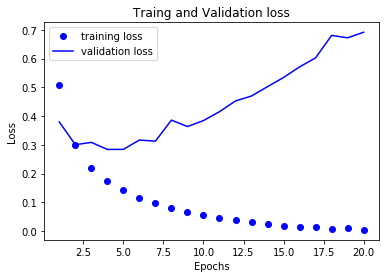

In [26]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('Traing and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

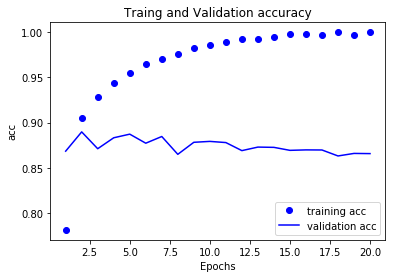

In [27]:
plt.clf()

history_dict=history.history
acc_values=history_dict['binary_accuracy']
val_acc_values=history_dict['val_binary_accuracy']

epochs=range(1,len(acc_values)+1)

plt.plot(epochs,acc_values,'bo',label='training acc')
plt.plot(epochs,val_acc_values,'b',label='validation acc')
plt.title('Traing and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

### Retraining the model with only 4 epochs(early stopping)

In [28]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 6s 369us/step - loss: 0.5341 - acc: 0.7901 - val_loss: 0.4088 - val_acc: 0.8690
Epoch 2/4
15000/15000 [==============================] - 5s 302us/step - loss: 0.3277 - acc: 0.8994 - val_loss: 0.3168 - val_acc: 0.8849
Epoch 3/4
15000/15000 [==============================] - 5s 304us/step - loss: 0.2377 - acc: 0.9240 - val_loss: 0.2833 - val_acc: 0.8898
Epoch 4/4
15000/15000 [==============================] - 5s 302us/step - loss: 0.1879 - acc: 0.9386 - val_loss: 0.2860 - val_acc: 0.8847


In [29]:
results=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 7s 296us/step


In [30]:
results

[0.3010383494758606, 0.87696]

In [31]:
model.predict(x_test)

array([[0.33753768],
       [0.99961567],
       [0.9334648 ],
       ...,
       [0.14532495],
       [0.19014244],
       [0.64739203]], dtype=float32)

### Experiments

#### Adding More Hidden layers

In [38]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 6s 410us/step - loss: 0.5605 - acc: 0.7384 - val_loss: 0.4221 - val_acc: 0.8682
Epoch 2/10
15000/15000 [==============================] - 5s 324us/step - loss: 0.3204 - acc: 0.9042 - val_loss: 0.3153 - val_acc: 0.8818
Epoch 3/10
15000/15000 [==============================] - 5s 318us/step - loss: 0.2232 - acc: 0.9319 - val_loss: 0.3358 - val_acc: 0.8641
Epoch 4/10
15000/15000 [==============================] - 5s 326us/step - loss: 0.1768 - acc: 0.9423 - val_loss: 0.2816 - val_acc: 0.8885
Epoch 5/10
15000/15000 [==============================] - 5s 334us/step - loss: 0.1402 - acc: 0.9567 - val_loss: 0.2912 - val_acc: 0.8868
Epoch 6/10
15000/15000 [==============================] - 5s 352us/step - loss: 0.1082 - acc: 0.9672 - val_loss: 0.3695 - val_acc: 0.8706
Epoch 7/10
15000/15000 [==============================] - 5s 352us/step - loss: 0.0839 - acc: 0.9768 - val_loss: 0.3518 - 

#### Adding Hidden Units

In [37]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 6s 381us/step - loss: 0.4696 - acc: 0.7983 - val_loss: 0.3857 - val_acc: 0.8373
Epoch 2/10
15000/15000 [==============================] - 5s 332us/step - loss: 0.2654 - acc: 0.9069 - val_loss: 0.3242 - val_acc: 0.8684
Epoch 3/10
15000/15000 [==============================] - 5s 331us/step - loss: 0.2034 - acc: 0.9281 - val_loss: 0.2738 - val_acc: 0.8912
Epoch 4/10
15000/15000 [==============================] - 5s 341us/step - loss: 0.1529 - acc: 0.9479 - val_loss: 0.2819 - val_acc: 0.8900
Epoch 5/10
15000/15000 [==============================] - 5s 339us/step - loss: 0.1191 - acc: 0.9602 - val_loss: 0.3422 - val_acc: 0.8728
Epoch 6/10
15000/15000 [==============================] - 5s 325us/step - loss: 0.0948 - acc: 0.9707 - val_loss: 0.3916 - val_acc: 0.8666
Epoch 7/10
15000/15000 [==============================] - 5s 334us/step - loss: 0.0744 - acc: 0.9776 - val_loss: 0.3463 - 

In [36]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 333us/step - loss: 0.1743 - acc: 0.8005 - val_loss: 0.1257 - val_acc: 0.8656
Epoch 2/4
15000/15000 [==============================] - 5s 301us/step - loss: 0.0963 - acc: 0.8993 - val_loss: 0.0989 - val_acc: 0.8786
Epoch 3/4
15000/15000 [==============================] - 4s 298us/step - loss: 0.0680 - acc: 0.9285 - val_loss: 0.0863 - val_acc: 0.8895
Epoch 4/4
15000/15000 [==============================] - 4s 297us/step - loss: 0.0538 - acc: 0.9415 - val_loss: 0.0827 - val_acc: 0.8918


In [35]:
model=models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 345us/step - loss: 0.5022 - acc: 0.7923 - val_loss: 0.3755 - val_acc: 0.8723
Epoch 2/4
15000/15000 [==============================] - 5s 304us/step - loss: 0.2929 - acc: 0.9069 - val_loss: 0.2927 - val_acc: 0.8888
Epoch 3/4
15000/15000 [==============================] - 5s 305us/step - loss: 0.2046 - acc: 0.9349 - val_loss: 0.2715 - val_acc: 0.8872
Epoch 4/4
15000/15000 [==============================] - 5s 302us/step - loss: 0.1572 - acc: 0.9496 - val_loss: 0.2823 - val_acc: 0.8850
